# ADVERSARIAL BANDITS

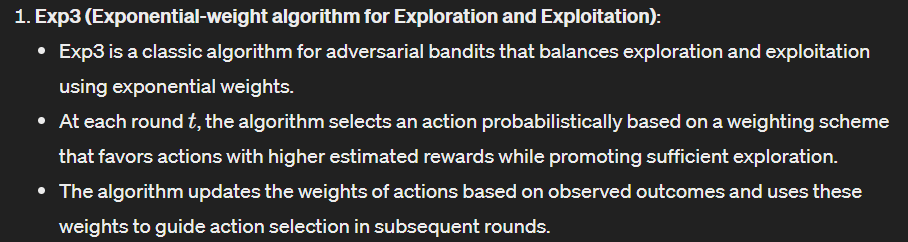

In [ ]:
import numpy as np

class Exp3:
    def __init__(self, num_actions, gamma):
        self.num_actions = num_actions
        self.weights = np.ones(num_actions)
        self.gamma = gamma

    def select_action(self):
        probabilities = (1 - self.gamma) * (self.weights / np.sum(self.weights)) + (self.gamma / self.num_actions)
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_weights(self, action, reward):
        probabilities = (1 - self.gamma) * (self.weights / np.sum(self.weights)) + (self.gamma / self.num_actions)
        estimated_reward = reward / probabilities[action]
        self.weights[action] *= np.exp((self.gamma / self.num_actions) * estimated_reward)

def run_exp3(num_actions, T, gamma):
    exp3 = Exp3(num_actions, gamma)
    cumulative_regret = 0
    rewards = np.zeros(T)

    for t in range(T):
        action = exp3.select_action()
        # Simulate adversarial reward
        reward = np.random.uniform(0, 1)  # Adversarial reward (can be customized)
        exp3.update_weights(action, reward)
        rewards[t] = reward
        if t > 0:
            cumulative_regret += np.max(rewards[:t+1]) - reward

    return cumulative_regret

# Example usage:
num_actions = 5
T = 1000
gamma = 0.1
regret_exp3 = run_exp3(num_actions, T, gamma)
print(f"Exp3 cumulative regret after {T} rounds: {regret_exp3}")

Exp3 cumulative regret after 1000 rounds: 488.35989981138573


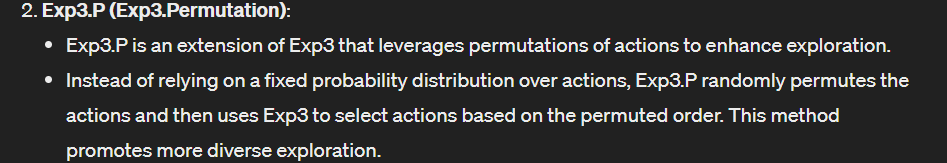

In [ ]:
import numpy as np

class Exp3P:
    def __init__(self, num_actions, gamma):
        self.num_actions = num_actions
        self.weights = np.ones(num_actions)
        self.gamma = gamma

    def select_action(self):
        permuted_indices = np.random.permutation(self.num_actions)
        probabilities = (1 - self.gamma) * (self.weights / np.sum(self.weights)) + (self.gamma / self.num_actions)
        action = np.random.choice(permuted_indices, p=probabilities[permuted_indices])
        return action

    def update_weights(self, action, reward):
        probabilities = (1 - self.gamma) * (self.weights / np.sum(self.weights)) + (self.gamma / self.num_actions)
        estimated_reward = reward / probabilities[action]
        self.weights[action] *= np.exp((self.gamma / self.num_actions) * estimated_reward)

def run_exp3p(num_actions, T, gamma):
    exp3p = Exp3P(num_actions, gamma)
    cumulative_regret = 0
    rewards = np.zeros(T)

    for t in range(T):
        action = exp3p.select_action()
        # Simulate adversarial reward
        reward = np.random.uniform(0, 1)  # Adversarial reward (can be customized)
        exp3p.update_weights(action, reward)
        rewards[t] = reward
        if t > 0:
            cumulative_regret += np.max(rewards[:t+1]) - reward

    return cumulative_regret

# Example usage:
regret_exp3p = run_exp3p(num_actions, T, gamma)
print(f"Exp3.P cumulative regret after {T} rounds: {regret_exp3p}")

Exp3.P cumulative regret after 1000 rounds: 500.84327966071874


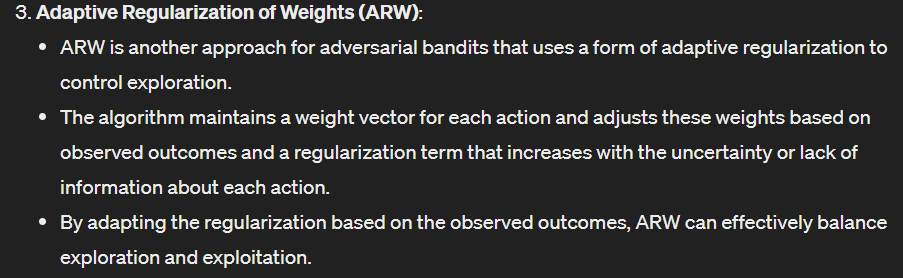

In [ ]:
import numpy as np

class ARW:
    def __init__(self, num_actions, eta):
        self.num_actions = num_actions
        self.weights = np.ones(num_actions)
        self.eta = eta

    def select_action(self):
        probabilities = self.weights / np.sum(self.weights)
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_weights(self, action, reward):
        estimated_reward = reward / (self.weights[action] + 1e-6)
        self.weights[action] *= np.exp(self.eta * estimated_reward)

    def get_cumulative_regret(self, rewards):
        cumulative_regret = 0
        max_reward_so_far = 0

        for reward in rewards:
            max_reward_so_far = max(max_reward_so_far, reward)
            cumulative_regret += max_reward_so_far - reward

        return cumulative_regret

def run_arw(num_actions, T, eta):
    arw = ARW(num_actions, eta)
    rewards = np.zeros(T)

    for t in range(T):
        action = arw.select_action()
        # Simulate adversarial reward
        reward = np.random.uniform(0, 1)  # Adversarial reward (can be customized)
        arw.update_weights(action, reward)
        rewards[t] = reward

    cumulative_regret = arw.get_cumulative_regret(rewards)
    return cumulative_regret

# Example usage:
num_actions = 5
T = 1000
eta = 0.1
regret_arw = run_arw(num_actions, T, eta)
print(f"ARW cumulative regret after {T} rounds: {regret_arw}")

ARW cumulative regret after 1000 rounds: 500.61816460391645


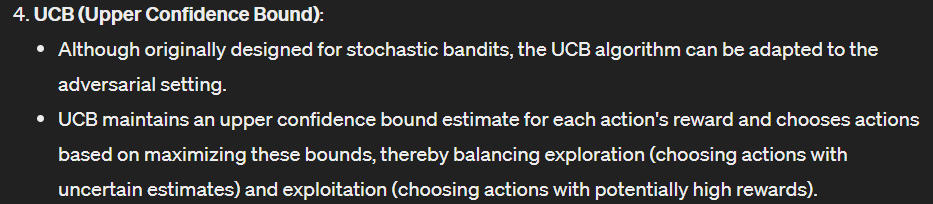

In [ ]:
import numpy as np

class UCB:
    def __init__(self, num_actions, c):
        self.num_actions = num_actions
        self.total_counts = np.zeros(num_actions)
        self.total_rewards = np.zeros(num_actions)
        self.c = c

    def select_action(self, timestep):
        ucb_values = self.total_rewards / (self.total_counts + 1e-6) + self.c * np.sqrt(np.log(timestep + 1) / (self.total_counts + 1e-6))
        action = np.argmax(ucb_values)
        return action

    def update_rewards(self, action, reward):
        self.total_counts[action] += 1
        self.total_rewards[action] += reward

def run_ucb(num_actions, T, c):
    ucb = UCB(num_actions, c)
    cumulative_regret = 0
    rewards = np.zeros(T)

    for t in range(T):
        action = ucb.select_action(t + 1)  # Pass timestep (t + 1) to select_action
        # Simulate adversarial reward
        reward = np.random.uniform(0, 1)  # Adversarial reward (can be customized)
        ucb.update_rewards(action, reward)
        rewards[t] = reward
        if t > 0:
            cumulative_regret += np.max(rewards[:t+1]) - reward

    return cumulative_regret

# Example usage:
num_actions = 5
T = 1000
c = 2.0
regret_ucb = run_ucb(num_actions, T, c)
print(f"UCB cumulative regret after {T} rounds: {regret_ucb}")

UCB cumulative regret after 1000 rounds: 493.002331577649


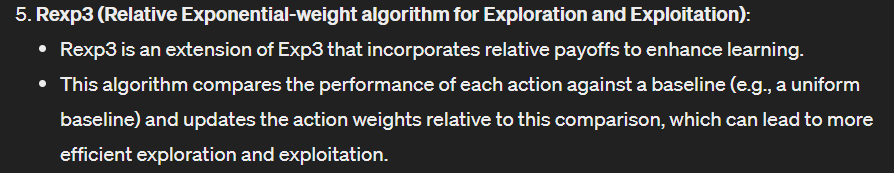

In [ ]:
import numpy as np

class Rexp3:
    def __init__(self, num_actions, gamma):
        self.num_actions = num_actions
        self.weights = np.ones(num_actions)
        self.gamma = gamma

    def select_action(self):
        probabilities = (1 - self.gamma) * (self.weights / np.sum(self.weights)) + (self.gamma / self.num_actions)
        action = np.random.choice(self.num_actions, p=probabilities)
        return action

    def update_weights(self, action, reward, baseline_reward):
        estimated_reward = (reward - baseline_reward) / (self.weights[action] + 1e-6)
        self.weights[action] *= np.exp(self.gamma * estimated_reward / self.num_actions)

    def get_cumulative_regret(self, rewards):
        cumulative_regret = 0
        max_reward_so_far = 0

        for reward in rewards:
            max_reward_so_far = max(max_reward_so_far, reward)
            cumulative_regret += max_reward_so_far - reward

        return cumulative_regret

def run_rexp3(num_actions, T, gamma):
    rexp3 = Rexp3(num_actions, gamma)
    rewards = np.zeros(T)
    baseline_reward = 0

    for t in range(T):
        action = rexp3.select_action()
        # Simulate adversarial reward
        reward = np.random.uniform(0, 1)  # Adversarial reward (can be customized)
        rexp3.update_weights(action, reward, baseline_reward)
        rewards[t] = reward
        baseline_reward = np.mean(rewards[:t+1])  # Update baseline reward

    cumulative_regret = rexp3.get_cumulative_regret(rewards)
    return cumulative_regret

# Example usage:
num_actions = 5
T = 1000
gamma = 0.1
regret_rexp3 = run_rexp3(num_actions, T, gamma)
print(f"Rexp3 cumulative regret after {T} rounds: {regret_rexp3}")


Rexp3 cumulative regret after 1000 rounds: 493.2907667195014
